In [89]:
#importing python packages
import matplotlib.pyplot as plt
import os
import nltk
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import seaborn as sn

In [2]:
#setting directory
os.chdir('C:\\Users\\574977\\PycharmProjects\\pepsico\\RPA_work')

In [6]:
#basic preprocessing
exclude = set(string.punctuation) 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['from']
stop_words.extend(newStopWords)
table = str.maketrans('', '', string.punctuation)

porter = PorterStemmer()

def normalize_document(doc):
    # tokenize document
    tokens = doc.split()
    # remove punctuation from each word
    tokens = [w.translate(table) for w in tokens]
    # convert to lower case
    lower_tokens = [w.lower() for w in tokens]
    #remove spaces
    stripped = [w.strip() for w in lower_tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter stopwords out of document
    filtered_tokens = [token for token in words if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [17]:
#data
fsha_data = pd.read_excel('FSHA - RPA.xlsx')

In [18]:
fsha_data.head()

,File Name,projName,accolNumber,PDA_projName,projType,projDesc,formulaNumber,owner,sector,center,...,Row6_Nuts,Row6_Peanuts,Row6_Soya,Row6_Celery,Row6_Lupin,Row6_Molluscs,Row6_Mustard,Row6_Sesame Seeds,Row6_Sulphites,Allergens_to_be_labeled (concatenated value from the rows)
0,#46565 FSHA 5.4.1Star Project G3 v2 + FS input...,S-T3-Star-• POL Star Puff (Chrupki) quality –POL,46565,1SKU Star Puffs Onion\n2 SKU Star Puffs Cheese...,Brand Refresh,Star Puffs Cheese & STar Hyper Cheese\nSeasoni...,NaN,Weronika Baranowska,ESSA,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36559-FSHA-in process (Phase 1 Indian pellet l...,Simba Shapes Next Gen,36559,"Simba Shapes - Playz, Simba Shapes Twistz",Breakthrough - South Africa & Nigeria,Purchase an existing Pellet spec used by Pepsi...,unknown,Dina Atoyan (+7(495)9370550 (*63402) ),ESSA,Beaumont Park / Johannesburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36559-FSHA-in process (Phase 2 Next Gen Launch...,Simba Shapes Next Gen,36559,Simba Shapes - Playz,Breakthrough - South Africa & Nigeria,"Commission a new pellet line in Prospecton, So...",unknown,Dina Atoyan (+7(495)9370550 (*63402) ),ESSA,Beaumont Park / Johannesburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36559-FSHA-in process (Phase 2 Next Gen Launch...,Simba Shapes Next Gen,36559,Simba Shapes Twistz,Breakthrough - South Africa & Nigeria,"Commission a new pellet line in Prospecton, So...",unknown,Dina Atoyan (+7(495)9370550 (*63402) ),ESSA,Beaumont Park / Johannesburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accolade Blend Flex project FSHA 5.4.1 + FS in...,Oil BlendFlex - HOSO,#44720,Lays and Simba Ruffles,Business continuation &/or Productivity,Validate a new oil blend for Lays and Simba to...,Lays and Simba Ruffles,Lizel Laubscher,ESSA,SSA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
fsha_data.columns.values

array(['File Name', ' projName', 'accolNumber', 'PDA_projName',
       'projType', 'projDesc', 'formulaNumber', 'owner', 'sector',
       'center', 'Current TSG Stage', 'FSAssessors', 'FSDate', 'WHTD',
       'manufacSite', 'PlantTrial', 'packMaterial', 'CPD-ProdName',
       'CPD-ProdName-Desc', 'procPlat', 'intrinsicProd', 'preservatives',
       'pH', 'waterActivity', 'packaging', 'otherFSA', 'allergens',
       'prodStorageDist', 'shelfLife', 'TCG', 'foodSafetyProdClaims',
       'cookedOrHeated', 'specificStorage', 'labelingInstructions ',
       'mishandled', 'targetMarket', 'fastTrack', 'baseProduct',
       'prodModifications', 'newIngredient', 'approvedPackage',
       'potentialMicrobial', 'crossContactAllergens', 'chokeHazard',
       'operationalAllergen', 'Row1_Gluten', 'Row1_Crustaceans',
       'Row1_Eggs', 'Row1_Fish', 'Row1_Milk', 'Row1_Nuts', 'Row1_Peanuts',
       'Row1_Soya', 'Row1_Celery', 'Row1_Lupin', 'Row1_Molluscs',
       'Row1_Mustard', 'Row1_Sesame Seeds', '

In [20]:
fsha_data['allergens']

0     Allergens in seasonings:\nCQ69 Vegetable Blend...
1     Inherent:\nCheddar Playz: Cereals containing G...
2     Pellets Inherent:\nCereals containing Gluten -...
3     Pellets Inherent:\nCereals containing Gluten -...
4     Standard allergen management for Seasoning. Th...
5     Inherent\n\nParmesan Cheese & Roasted Garlic B...
6     Inherent - Wheat, Gluten, Sulphites, Soya, Mil...
7     All current suppliers to PepsiCo have cross co...
8     One of below seasonings will be chosen, allerg...
9     Base allergens: None\nTop seasoning: Milk\n\nC...
10    Base allergens: None\nTop seasoning: Milk, Glu...
11                                         Wheat Gluten
12                                   milk, Soya, Barley
Name: allergens, dtype: object

In [23]:
#yes /no tag
fsha_data['potentialMicrobial']=fsha_data['potentialMicrobial'].apply(lambda x:1 if x == 'Yes' else 0)        
fsha_data['potentialMicrobial']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
Name: potentialMicrobial, dtype: int64

In [28]:
norm_allergens = normalize_corpus(fsha_data['allergens'])
norm_allergens[0]

'allergens seasonings vegetable blend mccormick milk lactose cheese symrise milk lactose product may contain peanut existing allergens manufacturing plant celery cereals containing gluten wheat barley oats milk mustard peanuts soya existing allergens production line celery cereals containing gluten wheat barley milk mustard peanuts soya'

In [52]:
df=pd.DataFrame(columns=['Allergy','potentialMicrobial'])
df['Allergy']=norm_allergens
df['potentialMicrobial']=fsha_data['potentialMicrobial']
#df=df([norm_allergens,fsha_data['potentialMicrobial']])

In [58]:
df[df.potentialMicrobial==1]

,Allergy,potentialMicrobial
7,current suppliers pepsico cross contaminated m...,1
9,base allergens none top seasoning milk crossco...,1


In [144]:
#considering count vectorizer for potentialMicrobial==1
vectorizer_1 = CountVectorizer(max_features=30)
X = vectorizer_1.fit_transform(df[df.potentialMicrobial==1].Allergy)
A=vectorizer_1.get_feature_names()
print(A)

['aligned', 'changed', 'contaminated', 'cross', 'crosscontact', 'current', 'ensure', 'film', 'future', 'gluten', 'grits', 'lead', 'maize', 'milk', 'none', 'peanuts', 'pepsico', 'products', 'project', 'regulatory', 'ruth', 'seasoning', 'soya', 'suadiye', 'suppliers', 'tarsus', 'top', 'trial', 'using', 'warning']


In [142]:
#considering count vectorizer for potentialMicrobial==1
vectorizer_0 = CountVectorizer(max_features=30)
Y = vectorizer_0.fit_transform(df[df.potentialMicrobial==0].Allergy)
B=vectorizer_0.get_feature_names()
print(B)

['allergens', 'barley', 'bbq', 'celery', 'cereals', 'cheese', 'contact', 'contain', 'containing', 'cross', 'crosscontact', 'existing', 'fusions', 'gluten', 'inherent', 'lactose', 'line', 'may', 'milk', 'mustard', 'none', 'peanut', 'peanuts', 'plant', 'playz', 'soya', 'sulphites', 'tomato', 'twistz', 'wheat']


In [143]:
#intersection
list(set(A) & set(B))

['crosscontact', 'milk', 'peanuts', 'cross', 'none', 'soya', 'gluten']

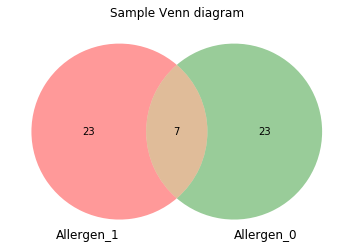

In [146]:
#venn diagram plot
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles
set1 = set(A)
set2 = set(B)
venn2([set1, set2], ('Allergen_1', 'Allergen_0'))
plt.title("Sample Venn diagram")
plt.show()